In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../tools/')
import tools
import numpy as np

# Load Data

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
x_train = train.drop(['SalePrice', 'Id'],axis=1)
y_train = train.SalePrice
x_test = test.drop(['Id'],axis=1)

In [3]:
prc = tools.Process(x_train,x_test,y_train)
prc_init = tools.Process(x_train,x_test,y_train)

# Preprocess

## Reject Outliers

In [4]:
save_index = prc.x_train[(prc.x_train.GrLivArea < 4500)].index.to_list()
prc.x_train = prc.x_train.loc[save_index]
prc.x_train.reset_index(drop = True, inplace = True)
prc.y_train = prc.y_train.loc[save_index]
prc.y_train.reset_index(drop = True, inplace = True)
prc.update()

## Numeric to Categoric

In [5]:
prc.x_all['MSSubClass'] = prc.x_all['MSSubClass'].apply(str)
prc.x_all['YrSold'] = prc.x_all['YrSold'].astype(str)
prc.x_all['MoSold'] = prc.x_all['MoSold'].astype(str)
prc.split()
prc.update()

## Fill MIssing Data

In [6]:
col_nans = prc_init.NANs(get_return=True,bar=False).index
prc.NANs(get_return=True,bar=False)

PoolQC          0.996915
MiscFeature     0.964004
Alley           0.932122
Fence           0.804251
FireplaceQu     0.486802
LotFrontage     0.166610
GarageCond      0.054508
GarageQual      0.054508
GarageYrBlt     0.054508
GarageFinish    0.054508
GarageType      0.053822
BsmtCond        0.028111
BsmtExposure    0.028111
BsmtQual        0.027768
BsmtFinType2    0.027425
BsmtFinType1    0.027083
MasVnrType      0.008228
MasVnrArea      0.007885
MSZoning        0.001371
BsmtHalfBath    0.000686
Utilities       0.000686
Functional      0.000686
BsmtFullBath    0.000686
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
Exterior2nd     0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Exterior1st     0.000343
SaleType        0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageArea      0.000343
GarageCars      0.000343
dtype: float64

In [7]:
prc.unique(input_cols=col_nans)

Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64 

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64 

Grvl    120
Pave     78
Name: Alley, dtype: int64 

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64 

Gd    742
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64 

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
182.0      1
119.0      1
195.0      1
153.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64 

TA    2652
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64 

TA    2602
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64 

2005.0    142
2006.0    115
2007.0    114
2004.0     99
2003.0     92
         ... 
1933.0      1
1943.0      1
1906.0      1
1919.0      1
1896.0      1
Name: GarageYrBlt, Length: 103, dtype: int64 

Unf    1230
RFn     811
Fin     717
Name: GarageFinish, dtype: int64 

Attchd     1722

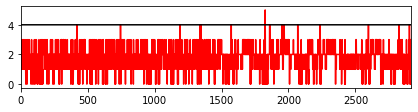

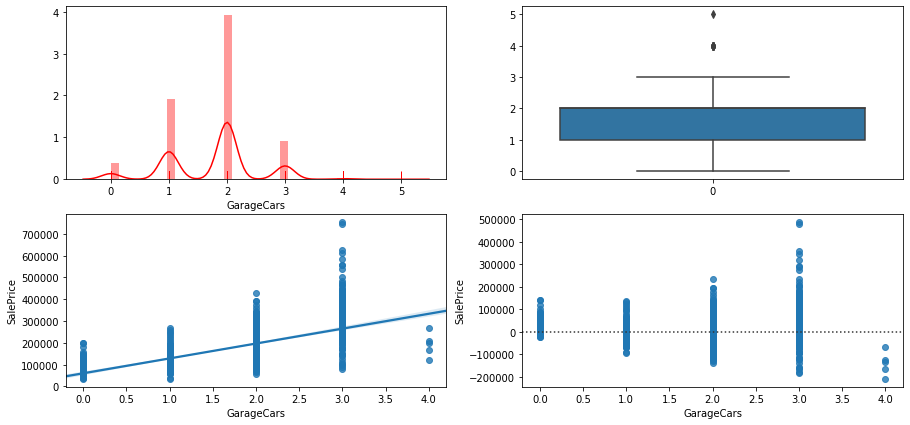

GarageCars has 1 NaNs (0.03%).
Correlation Coefficient (GarageCars vs SalePrice): 0.641
Skewness : -0.22
Kurtosis : 0.24
Number of anomaly scores over threshold(1.0%) : 17 / 2917
Border line :  4.0
----------------------------------------------------------------------------------------------------------------------------------


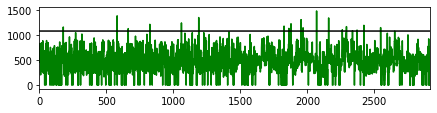

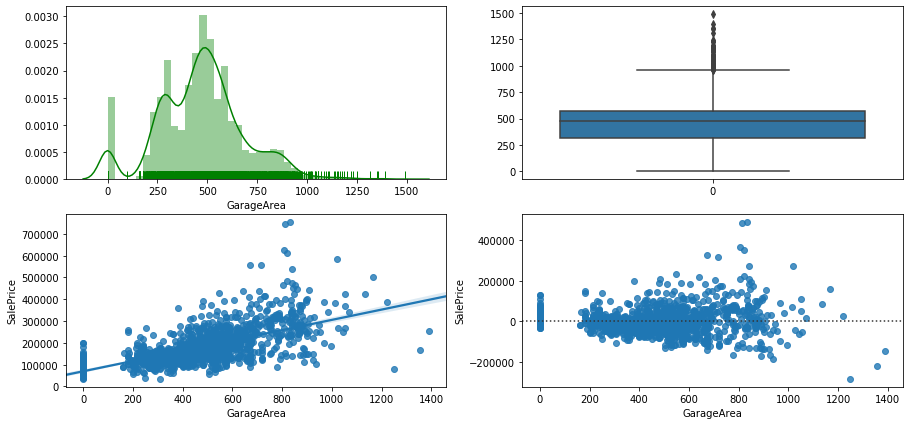

GarageArea has 1 NaNs (0.03%).
Correlation Coefficient (GarageArea vs SalePrice): 0.629
Skewness : 0.22
Kurtosis : 0.87
Number of anomaly scores over threshold(1.0%) : 20 / 2917
Border line :  1085.0
----------------------------------------------------------------------------------------------------------------------------------


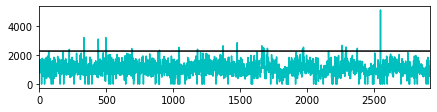

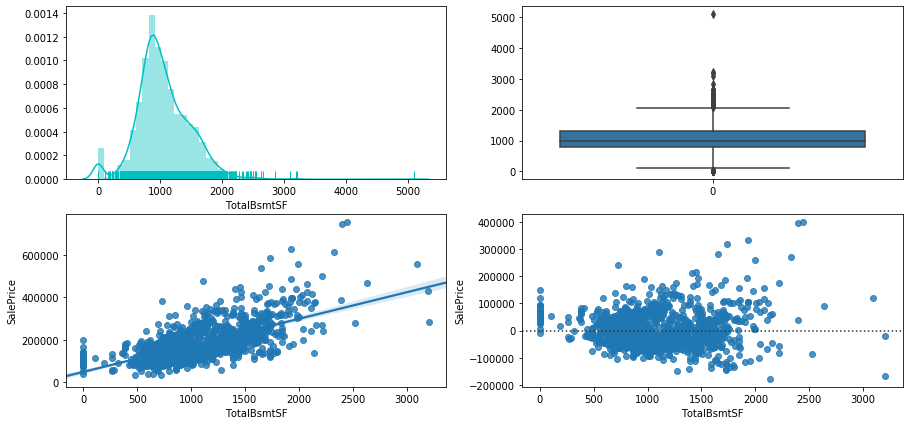

TotalBsmtSF has 1 NaNs (0.03%).
Correlation Coefficient (TotalBsmtSF vs SalePrice): 0.651
Skewness : 0.68
Kurtosis : 3.72
Number of anomaly scores over threshold(1.0%) : 22 / 2917
Border line :  2271.0
----------------------------------------------------------------------------------------------------------------------------------


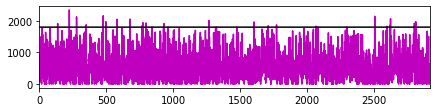

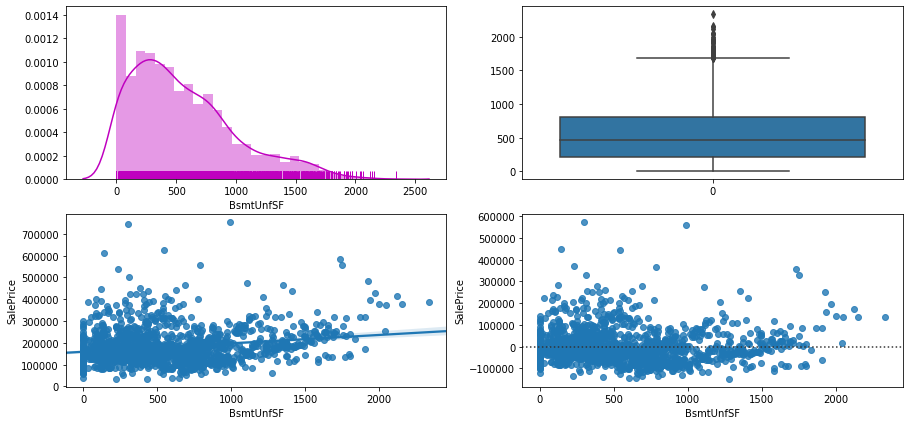

BsmtUnfSF has 1 NaNs (0.03%).
Correlation Coefficient (BsmtUnfSF vs SalePrice): 0.214
Skewness : 0.92
Kurtosis : 0.40
Number of anomaly scores over threshold(1.0%) : 28 / 2917
Border line :  1795.0
----------------------------------------------------------------------------------------------------------------------------------


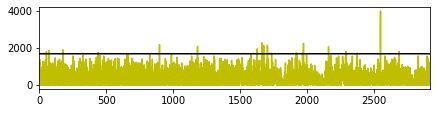

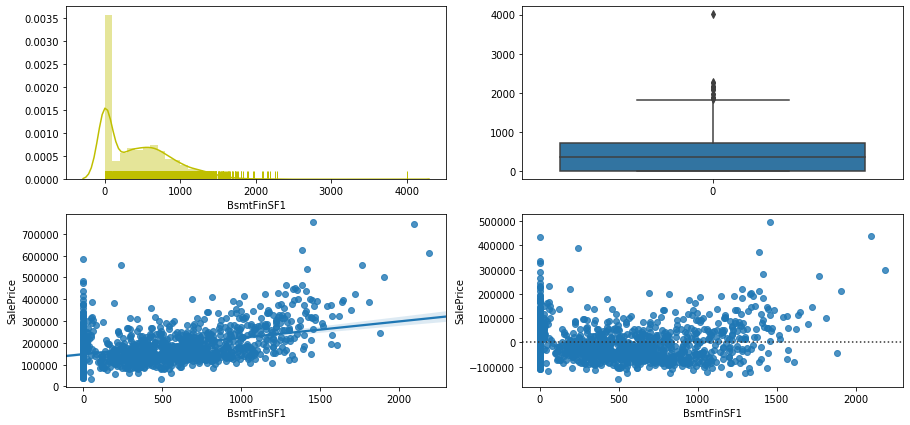

BsmtFinSF1 has 1 NaNs (0.03%).
Correlation Coefficient (BsmtFinSF1 vs SalePrice): 0.409
Skewness : 0.98
Kurtosis : 1.43
Number of anomaly scores over threshold(1.0%) : 22 / 2917
Border line :  1696.0
----------------------------------------------------------------------------------------------------------------------------------


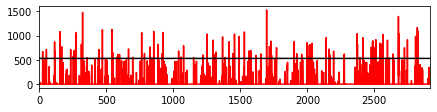

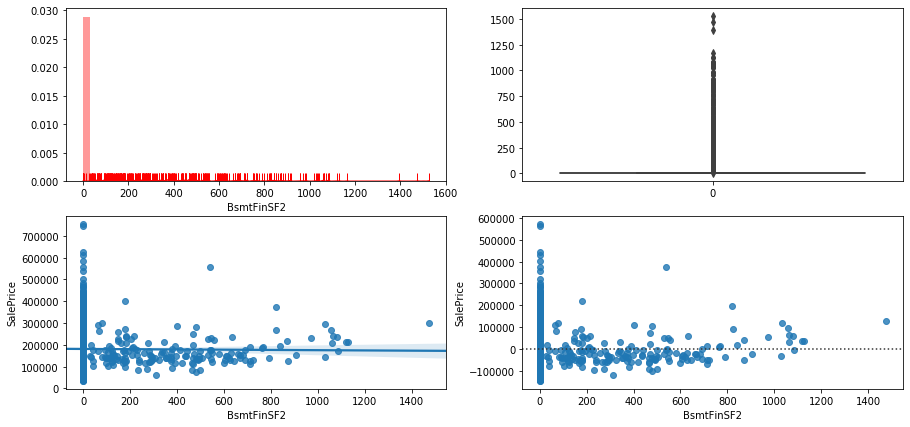

BsmtFinSF2 has 1 NaNs (0.03%).
Correlation Coefficient (BsmtFinSF2 vs SalePrice): -0.011
Skewness : 4.15
Kurtosis : 18.82
Number of anomaly scores over threshold(1.0%) : 107 / 2917
Border line :  529.0
----------------------------------------------------------------------------------------------------------------------------------


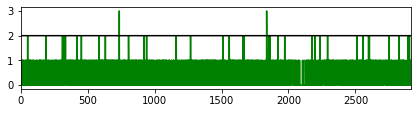

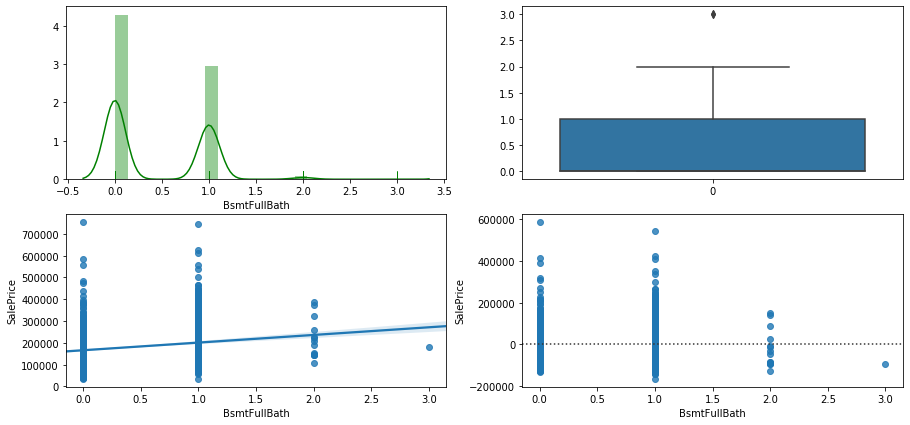

BsmtFullBath has 2 NaNs (0.07%).
Correlation Coefficient (BsmtFullBath vs SalePrice): 0.228
Skewness : 0.62
Kurtosis : -0.75
Number of anomaly scores over threshold(1.0%) : 39 / 2917
Border line :  2.0
----------------------------------------------------------------------------------------------------------------------------------


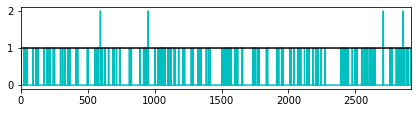

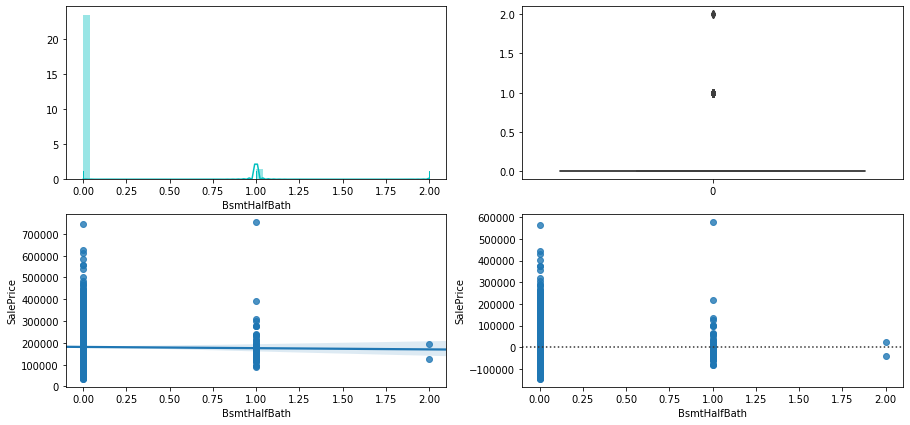

BsmtHalfBath has 2 NaNs (0.07%).
Correlation Coefficient (BsmtHalfBath vs SalePrice): -0.017
Skewness : 3.93
Kurtosis : 14.83
Number of anomaly scores over threshold(1.0%) : 175 / 2917
Border line :  1.0
----------------------------------------------------------------------------------------------------------------------------------


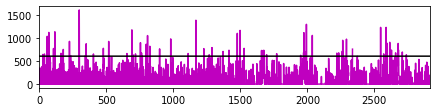

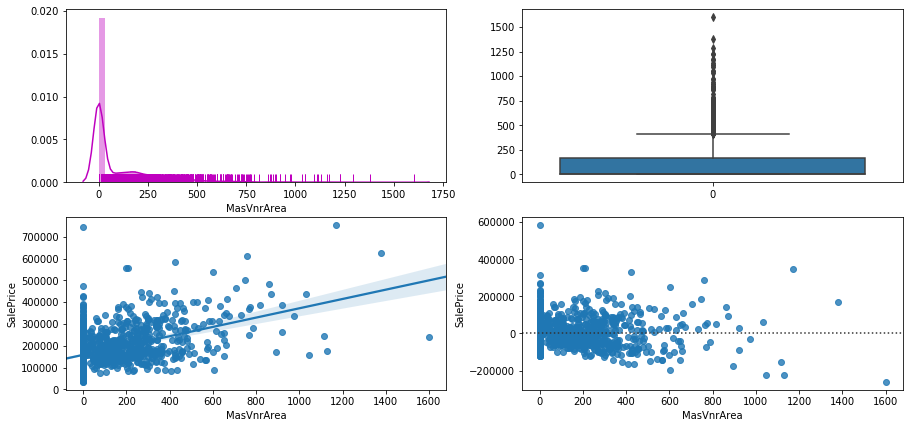

MasVnrArea has 23 NaNs (0.79%).
Correlation Coefficient (MasVnrArea vs SalePrice): 0.483
Skewness : 2.61
Kurtosis : 9.37
Number of anomaly scores over threshold(1.0%) : 71 / 2917
Border line :  603.0
----------------------------------------------------------------------------------------------------------------------------------


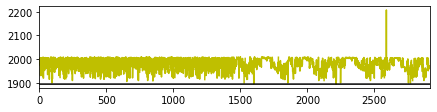

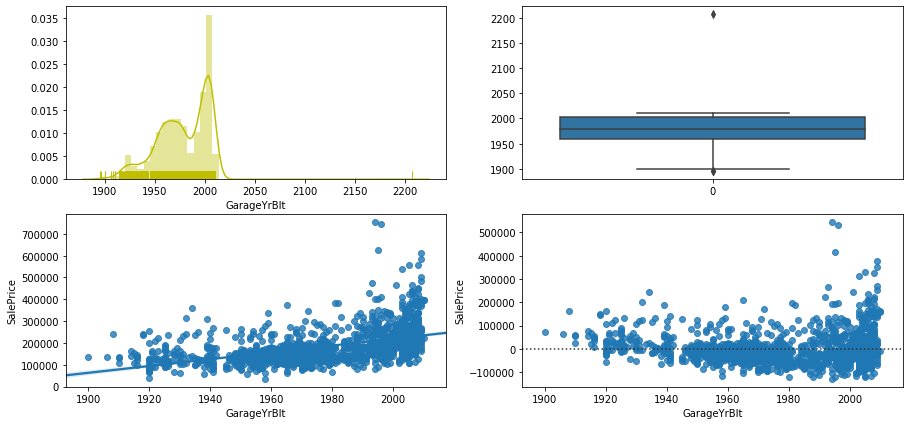

GarageYrBlt has 159 NaNs (5.45%).
Correlation Coefficient (GarageYrBlt vs SalePrice): 0.487
Skewness : -0.38
Kurtosis : 1.81
Number of anomaly scores over threshold(1.0%) : 11 / 2917
Border line :  1895.0
----------------------------------------------------------------------------------------------------------------------------------


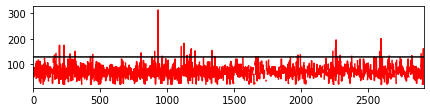

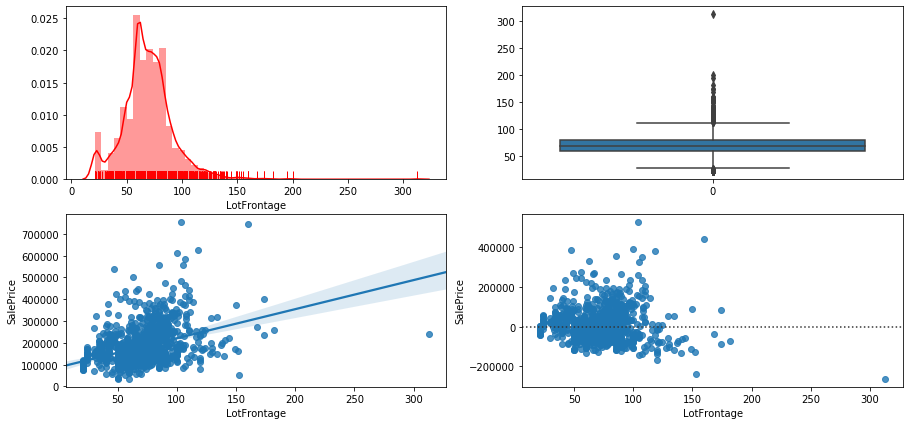

LotFrontage has 486 NaNs (16.66%).
Correlation Coefficient (LotFrontage vs SalePrice): 0.371
Skewness : 1.12
Kurtosis : 7.36
Number of anomaly scores over threshold(1.0%) : 41 / 2917
Border line :  128.0
----------------------------------------------------------------------------------------------------------------------------------


In [8]:
prc.NANs(bar=False, plot=True)

In [9]:
# ### Filling these with MODE , i.e. , the most frequent value in these columns .
# prc.x_all['Functional'] = prc.x_all['Functional'].fillna(prc.x_all['Functional'].mode()[0]) 
# prc.x_all['Electrical'] = prc.x_all['Electrical'].fillna(prc.x_all['Electrical'].mode()[0]) 
# prc.x_all['KitchenQual'] = prc.x_all['KitchenQual'].fillna(prc.x_all['KitchenQual'].mode()[0]) 
# prc.x_all['Exterior1st'] = prc.x_all['Exterior1st'].fillna(prc.x_all['Exterior1st'].mode()[0]) 
# prc.x_all['Exterior2nd'] = prc.x_all['Exterior2nd'].fillna(prc.x_all['Exterior2nd'].mode()[0])
# prc.x_all['SaleType'] = prc.x_all['SaleType'].fillna(prc.x_all['SaleType'].mode()[0])

# ### Missing data in GarageYrBit most probably means missing Garage , so replace NaN with zero . 
# for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
#     prc.x_all[col] = prc.x_all[col].fillna(0)
# for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
#     prc.x_all[col] = prc.x_all[col].fillna('None')

# ### Same with basement
# for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
#     prc.x_all[col] = prc.x_all[col].fillna('None')
    
# ### Same with pool    
# prc.x_all['PoolQC'] = prc.x_all['PoolQC'].fillna('None')
    
# ### Filll the missing values of MSZoning with the mode (The frequently category appearing) By each MSsubclass  
# prc.x_all['MSZoning'] = prc.x_all.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# ### Filll the missing values of LotFrontage with the mode (The frequently category appearing) By each Neighborhood 
# prc.x_all['LotFrontage'] = prc.x_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
# prc.split()
# prc.update()

In [10]:
prc.fill(
#     fill_method_num=0,
    fill_method_num='median',
#     fill_method_object='None',
    fill_method_object='mode',
    inplace=True)

Missing NAN of Numeric types is filled by : median.
Missing NAN of Numeric types is filled by : mode.


## Fix skews

In [11]:
prc.transY(method='log', inplace=True)
prc.transF(
    threshold=0.5,
    method='boxcox',
    inplace=True)

/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


## Make Features

In [12]:
# prc.x_all = prc.x_all.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

# prc.x_all['YrBltAndRemod']=prc.x_all['YearBuilt']+prc.x_all['YearRemodAdd']
# prc.x_all['TotalSF']=prc.x_all['TotalBsmtSF'] + prc.x_all['1stFlrSF'] + prc.x_all['2ndFlrSF']

# prc.x_all['Total_sqr_footage'] = (prc.x_all['BsmtFinSF1'] + prc.x_all['BsmtFinSF2'] +
#                                  prc.x_all['1stFlrSF'] + prc.x_all['2ndFlrSF'])

# prc.x_all['Total_Bathrooms'] = (prc.x_all['FullBath'] + (0.5 * prc.x_all['HalfBath']) +
#                                prc.x_all['BsmtFullBath'] + (0.5 * prc.x_all['BsmtHalfBath']))

# prc.x_all['Total_porch_sf'] = (prc.x_all['OpenPorchSF'] + prc.x_all['3SsnPorch'] +
#                               prc.x_all['EnclosedPorch'] + prc.x_all['ScreenPorch'] +
#                               prc.x_all['WoodDeckSF'])

# prc.x_all['haspool'] = prc.x_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# prc.x_all['has2ndfloor'] = prc.x_all['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# prc.x_all['hasgarage'] = prc.x_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# prc.x_all['hasbsmt'] = prc.x_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# prc.x_all['hasfireplace'] = prc.x_all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# prc.split()
# prc.update()

## Get Dummies

In [13]:
prc.x_all = pd.get_dummies(prc.x_all).reset_index(drop=True)
prc.split()
prc.update()
prc.x_all.shape

(2917, 317)

## Split

In [14]:
X = prc.x_train
X_test = prc.x_test
y = prc.y_train
X.shape, y.shape, X_test.shape

((1458, 317), (1458,), (1459, 317))

## Option

In [15]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)
X_test = X_test.drop(overfit, axis=1)
overfit

['MSSubClass_150']

In [16]:
X.shape, y.shape, X_test.shape

((1453, 316), (1453,), (1459, 316))

# Regression

## Modules

In [17]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## Scaling

In [18]:
tmp_all = pd.concat([X, X_test], sort=False, ignore_index=True, axis=0)
transformer = RobustScaler().fit(tmp_all)
X = transformer.transform(X)
X_test = transformer.transform(X_test)

## Modeling

### Setup for Cross Validation

In [19]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

### Models

In [20]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [21]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [22]:
gbr = GradientBoostingRegressor(
    n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
    min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)                             

In [23]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [24]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

### Each Model's Scores

In [25]:
score = cv_rmse(ridge , X)
score = cv_rmse(lasso , X)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("Elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("LightGBM: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GBM: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("XGBoost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 0.1002 (0.0150)
 2019-12-24 18:19:58.412300
Elastic net: 0.1001 (0.0148)
 2019-12-24 18:20:14.121930
SVR: 0.1012 (0.0146)
 2019-12-24 18:20:23.852124
LightGBM: 0.1061 (0.0154)
 2019-12-24 18:20:38.270424
GBM: 0.1080 (0.0134)
 2019-12-24 18:21:50.055037
[18:21:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:22:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:22:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:22:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:22:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:22:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:23:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:23:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:23:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:23:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: 0.1060 (0.0139)
 2019-12-24 18:23:51.590191


## Fit

In [26]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(X, y)

print('Elastic net')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('XGBoost')
xgb_model_full_data = xgboost.fit(X, y)

print('LightGBM')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
[18:24:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:24:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:25:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:25:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:25:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:25:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:26:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Elastic net
Lasso
Ridge
Svr
GradientBoosting
XGBoost
[18:26:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


LightGBM


## Blending

In [27]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [28]:
# def blend_models_predict(X):
#     return (
#             (0.4 * ridge_model_full_data.predict(X)) + \
#             (0.3 * svr_model_full_data.predict(X)) + \
#             (0.3 * lgb_model_full_data.predict(X)))

In [29]:
print('RMSLE score on train data:')
print('Elastic : ', rmsle(y, elastic_model_full_data.predict(X)))
print('Lasso : ', rmsle(y, lasso_model_full_data.predict(X)))
print('Ridge : ', rmsle(y, ridge_model_full_data.predict(X)))
print('SVR : ', rmsle(y, svr_model_full_data.predict(X)))
print('GBR : ', rmsle(y, gbr_model_full_data.predict(X)))
print('XGB : ', rmsle(y, xgb_model_full_data.predict(X)))
print('LightGB : ', rmsle(y, lgb_model_full_data.predict(X)))
print('Staking model : ', rmsle(y, stack_gen_model.predict(np.array(X))))
print('Blending model : ', rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
Elastic :  0.09025944471525037
Lasso :  0.09031969962227356
Ridge :  0.08725400453410903
SVR :  0.08467300887852326
GBR :  0.040812055676689454
XGB :  0.047887659801384055
LightGB :  0.0709910565831116
Staking model :  0.04505362740734148
Blending model :  0.05711905755792214


# Submit

In [34]:
print('Predict submission')
submission = pd.read_csv("../data/sample_submission.csv")
# submission.iloc[:,1] = (np.expm1(blend_models_predict(X_test)))
submission.iloc[:,1] = (np.expm1(ridge_model_full_data.predict(X_test)))

Predict submission


In [35]:
# q1 = submission['SalePrice'].quantile(0.0042)
# q2 = submission['SalePrice'].quantile(0.99)
# # Quantiles helping us get some extreme values for extremely low or high values 
# submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
# submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

In [36]:
submission.to_csv("../data/submission_ridge.csv", index=False)

In [37]:
submission.head()

,Id,SalePrice
0,1461,120517.279775
1,1462,157124.461432
2,1463,185381.085989
3,1464,201514.141901
4,1465,191991.844590


# References

- referenced kernel\
https://www.kaggle.com/niteshx2/top-50-beginners-stacking-lgb-xgb